<a href="https://colab.research.google.com/github/RosemaryYool/Notes-for-AI-in-Science-and-Medicine/blob/main/ES_DERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First code cell imports the dermamnist.npz from device onto the CoLab.

In [5]:
from google.colab import files

uploaded = files.upload()


Saving dermamnist.npz to dermamnist.npz


This uses the NumPy module .load to bring in the uploaded file from my device.
The train_images, val_images, etc are the key items and how they are labeled in the existing npz file. 


---
The last action in printing the .shape that we have seen before. The .shape gives the dimensions of the array. 


In [12]:
import numpy as np

# Load the npz file
data = np.load('dermamnist.npz')

# Access the images and labels
train_images = data['train_images']
val_images = data['val_images']
test_images = data['test_images']
train_labels = data['train_labels']
val_labels = data['val_labels']
test_labels = data['test_labels']

# Print the shape of the images and labels arrays
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(7007, 28, 28, 3)
(1003, 28, 28, 3)
(2005, 28, 28, 3)
(7007, 1)
(1003, 1)
(2005, 1)


In the ordered triple `(7007, 28, 28, 3)`, the first dimension `7007` represents the number of images in the dataset. The following dimensions `28, 28` represent the height and width of each image, respectively. Finally, the last dimension `3` represents the color channels of the images.

Since the last dimension is `3`, it indicates that the images in your dataset are RGB (Red, Green, Blue) images, where each pixel is represented by three color channels. This means that each image has three values (intensity levels) associated with each pixel, corresponding to the intensity of red, green, and blue colors.

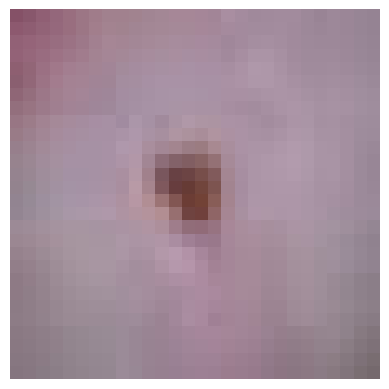

In [75]:
import matplotlib.pyplot as plt

# Load the dataset
data = np.load('dermamnist.npz')
x = data['train_images']

# Select an image to plot; can change the index to run through all images in the dataset.
image = x[800]

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


In [76]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

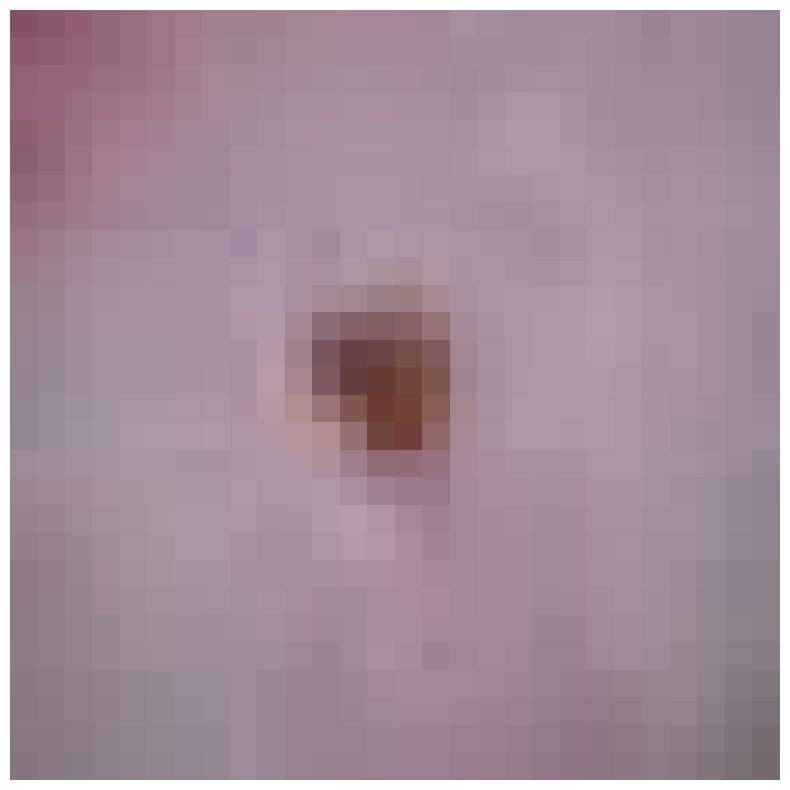

In [77]:
plot(image)

In [93]:
image = image.astype(float)
image /= 255.0

In [94]:
a = np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])

In [95]:
a

matrix([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]])

In [96]:
f = a

In [97]:
x = image

In [98]:
f

matrix([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]])

In [99]:
f[2,2]

-1

In [100]:
x2 = np.zeros(x.shape)

In [101]:
for i in range(1,x.shape[0]-1):
    for j in range(1,x.shape[1]-1):
        
        x2[i,j] = f[0,0] * x[i-1,j-1]  \
        +         f[0,1] * x[i-1,j]    \
        +         f[0,2] * x[i-1,j+1]  \
        +         f[1,0] * x[i,j-1]    \
        +         f[1,1] * x[i,j]      \
        +         f[1,2] * x[i,j+1]    \
        +         f[2,0] * x[i+1,j-1]  \
        +         f[2,1] * x[i+1,j]    \
        +         f[2,2] * x[i+1,j+1]

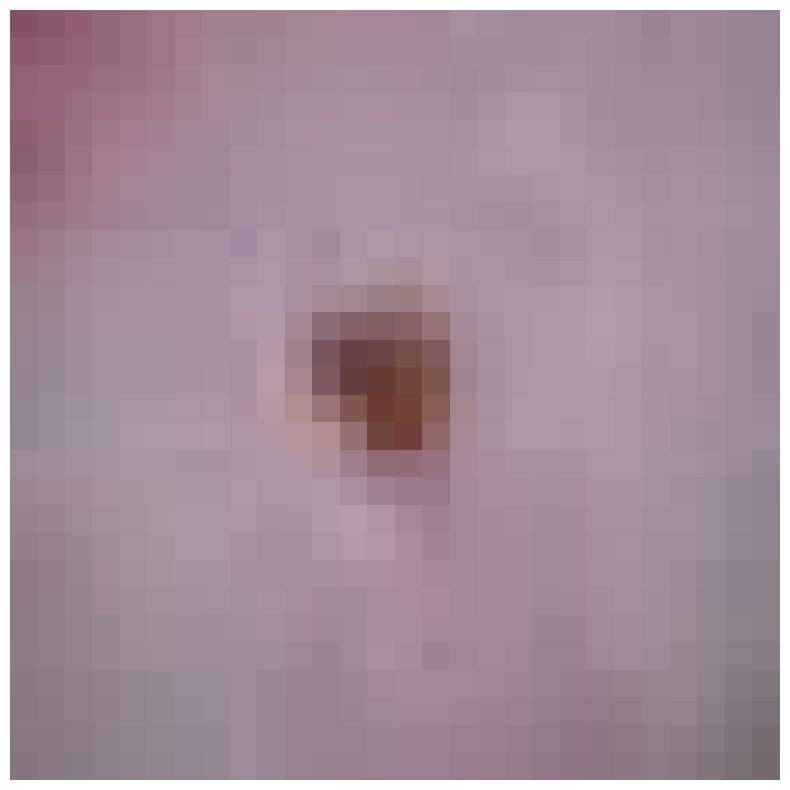

In [102]:
plot(x)

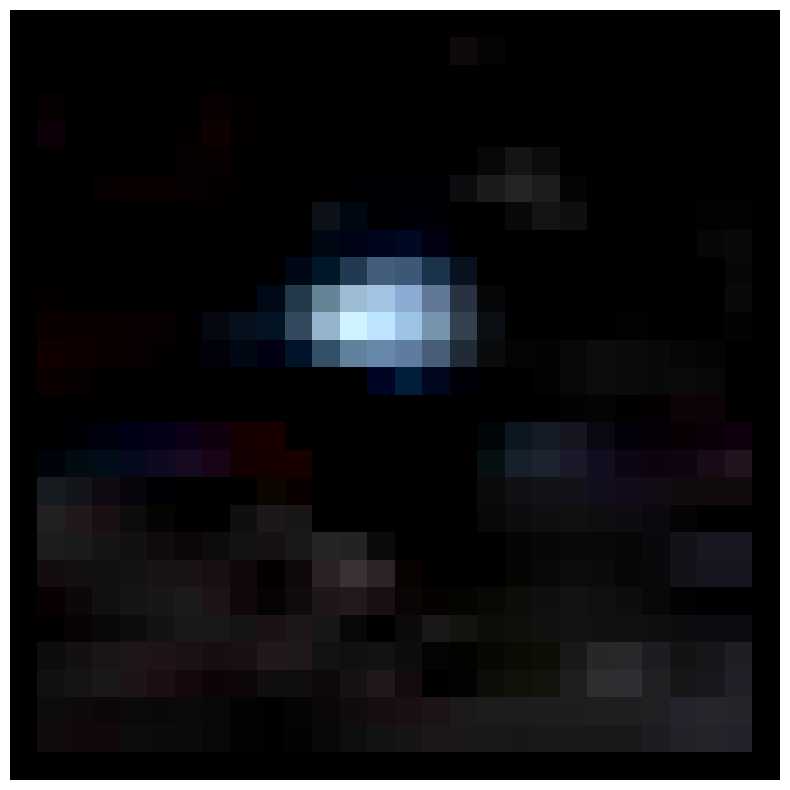

In [103]:
plot(x2)

In [89]:
def conv2(x,f):
    x2 = np.zeros(x.shape)
    for i in range(1,x.shape[0]-1):
        for j in range(1,x.shape[1]-1):
        
            x2[i,j] = f[0,0] * x[i-1,j-1] \
            +         f[0,1] * x[i-1,j] \
            +         f[0,2] * x[i-1,j+1] \
            +         f[1,0] * x[i,j-1] \
            +         f[1,1] * x[i,j] \
            +         f[1,2] * x[i,j+1] \
            +         f[2,0] * x[i+1,j-1] \
            +         f[2,1] * x[i+1,j] \
            +         f[2,2] * x[i+1,j+1]
            
    return x2

In [90]:
#a=np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
# a=np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])
a=np.matrix([[1,1,1],[1,1,1],[1,1,1]])
# a=5*np.random.random((3,3))-5*np.random.random((3,3))

In [91]:
z = conv2(x,a)

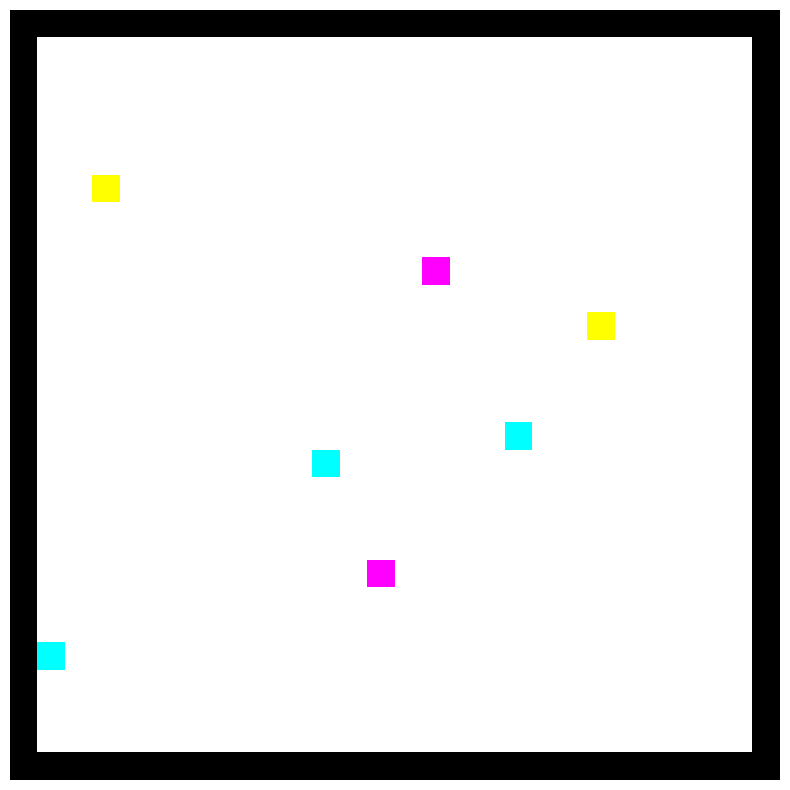

In [92]:
plot(z)

[[-0.12809538 -0.45689666 -0.87721142]
 [ 0.50540431 -0.34341783 -0.67101936]
 [ 0.56525373  0.51733768  0.33218854]]


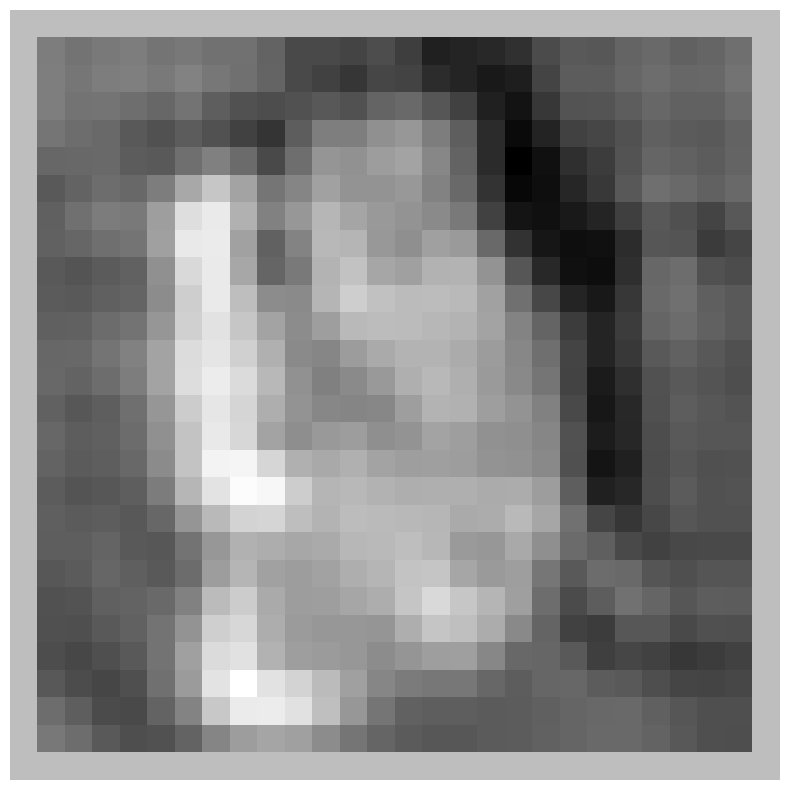

[[ 0.62755174 -0.70536434 -0.70637782]
 [ 0.47441629 -0.79351503 -0.55378544]
 [-0.5794186   0.82389539  0.2818213 ]]


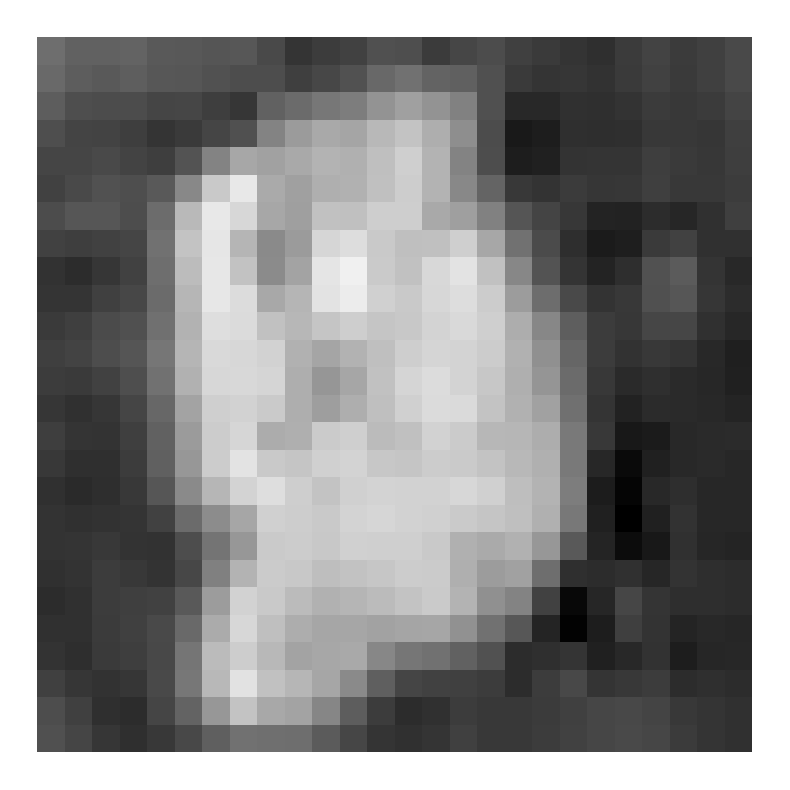

[[ 0.01072034 -0.55235058 -0.94824064]
 [-0.89040182  0.15034093 -0.99460693]
 [ 0.53485207 -0.76658939 -0.24197973]]


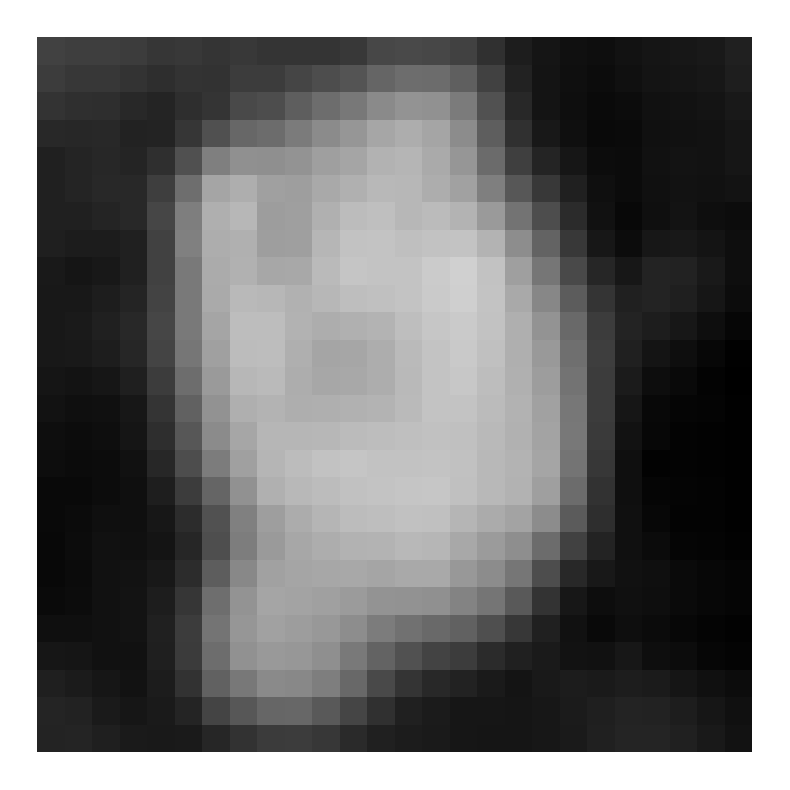

[[-0.17954117  0.53318985  0.87840264]
 [-0.39111969  0.02526818 -0.38459855]
 [ 0.30591177 -0.1365197  -0.24882431]]


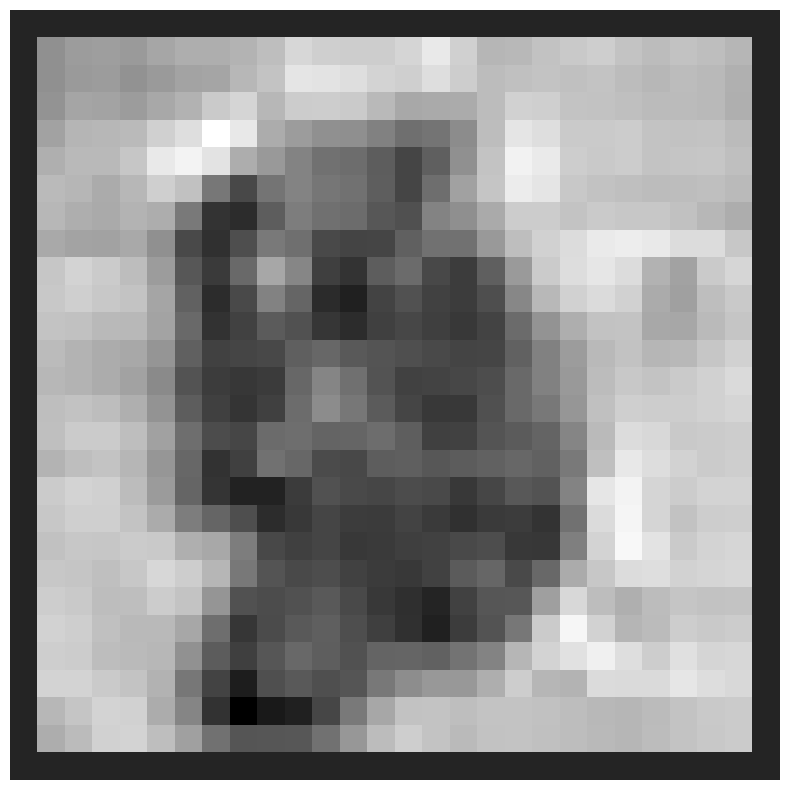

[[-0.68260706 -0.2056423   0.19223924]
 [ 0.41683048  0.42080132  0.0561681 ]
 [ 0.73206117 -0.05849877 -0.60672143]]


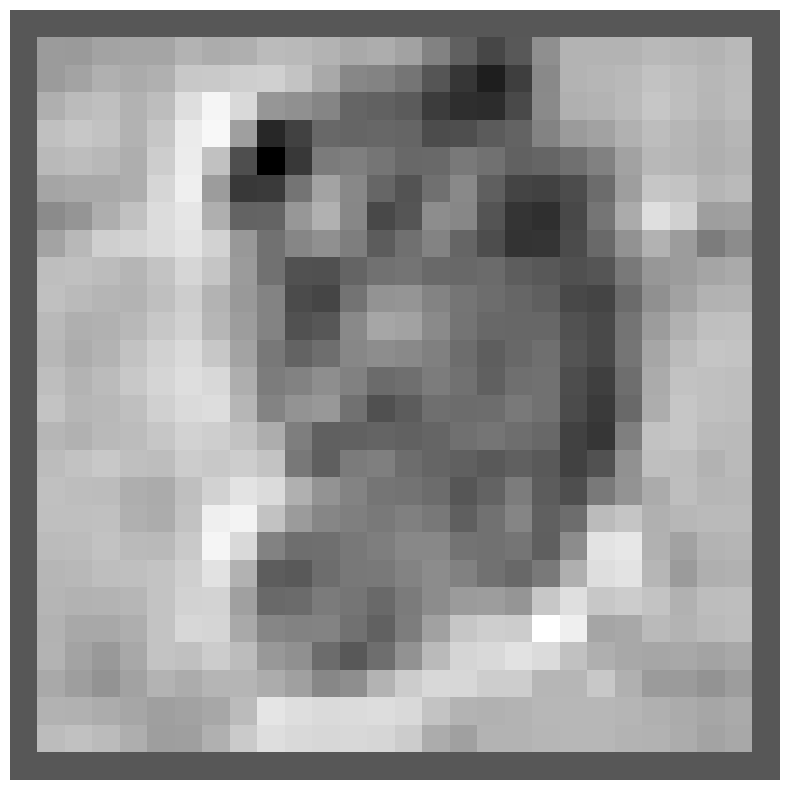

[[ 0.13239494 -0.41331419  0.61949409]
 [ 0.22560459 -0.37562382  0.47394718]
 [-0.35292331 -0.67057103 -0.21512653]]


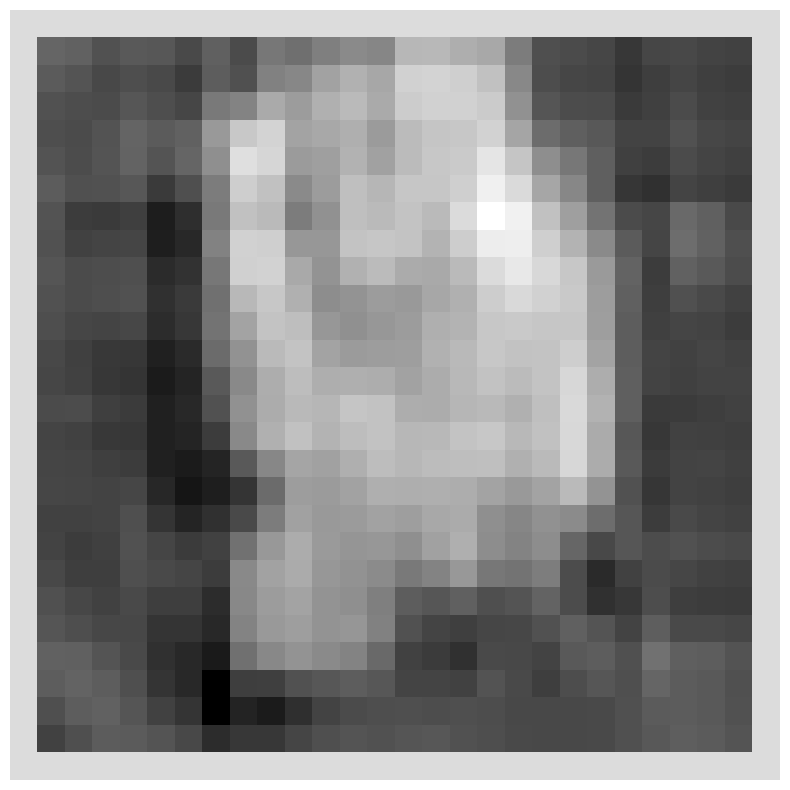

[[ 0.19605038  0.49431653  0.40960023]
 [-0.08080732 -0.06012416  0.01282566]
 [ 0.80419654  0.95758729 -0.10675933]]


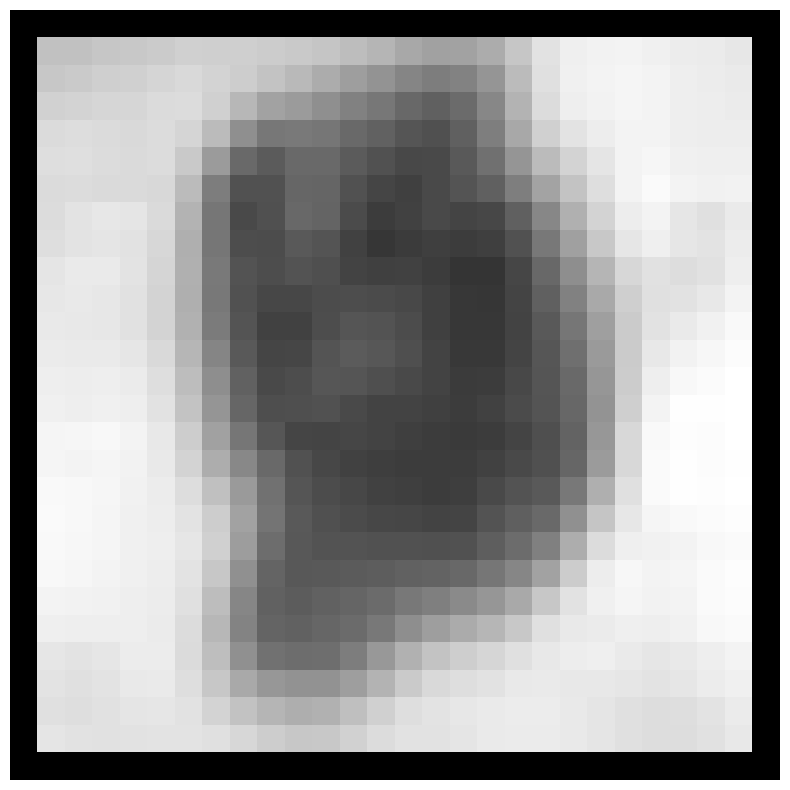

[[-0.46333529  0.79099945 -0.16055485]
 [-0.17170633 -0.4807428   0.46053889]
 [ 0.84922617 -0.37558008  0.58431946]]


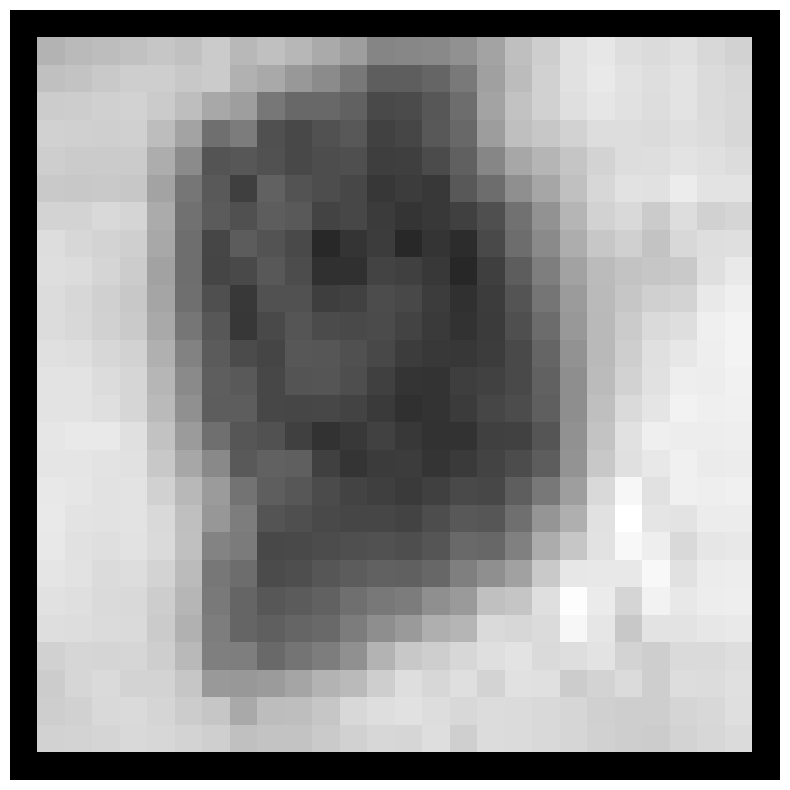

[[-0.25471204 -0.07178127 -0.91414995]
 [-0.89559164 -0.37007756 -0.73767559]
 [ 0.31887707  0.39055361  0.83590885]]


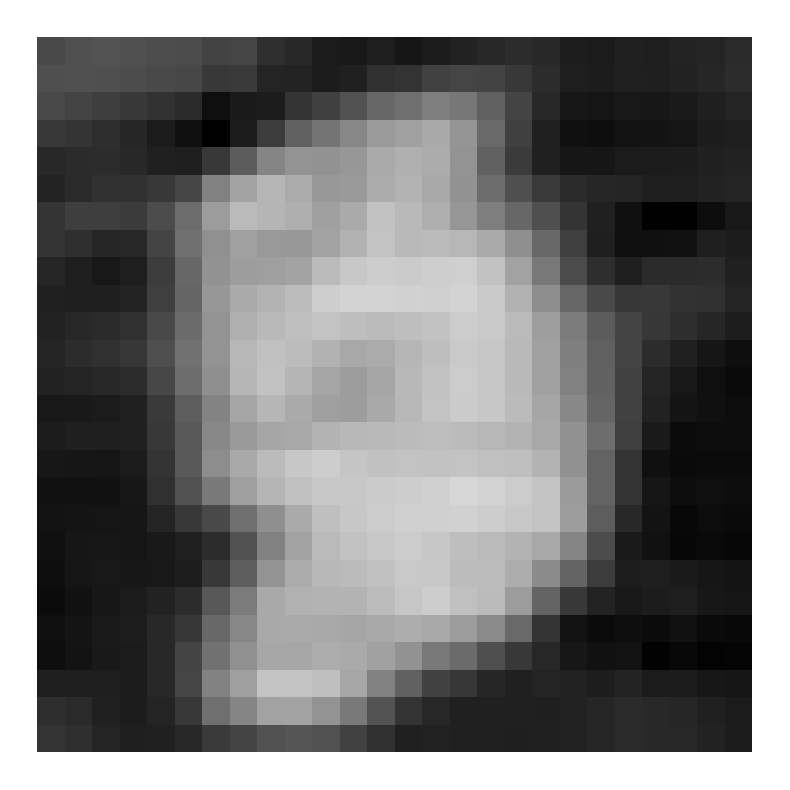

In [74]:
for i in range(9):
    a = 2*np.random.random((3,3))-1
    print(a)
    z=conv2(x,a)
    plot(z)